In [300]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from pandas import DataFrame
from scipy.signal import savgol_filter

In [301]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
data_x = FLT_1.iloc[:,1:7]
data_y = FLT_1.iloc[:,7:10]

y1 = data_y['Cd'].to_numpy()
y2 = data_y['Cl'].to_numpy()
y3 = data_y['Cm'].to_numpy()

y1 = savgol_filter(y1,window_length=8000, polyorder=4)
y2 = savgol_filter(y2,window_length=8000, polyorder=4)
y3 = savgol_filter(y3,window_length=8000, polyorder=4)

data_y = {'Cd':y1,
          'Cl':y2,
          'Cm':y3}

data_y = pd.DataFrame(data_y)



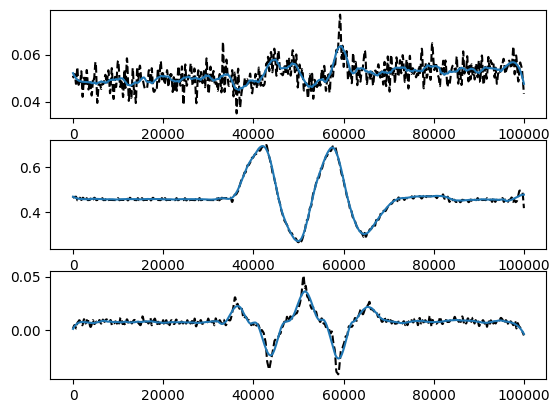

In [302]:
fig, ax = plt.subplots(3)
ax[0].plot(FLT_1['Cd'], 'k--')
ax[0].plot(data_y['Cd'])
ax[1].plot(FLT_1['Cl'], 'k--')
ax[1].plot(data_y['Cl'])
ax[2].plot(FLT_1['Cm'], 'k--')
ax[2].plot(data_y['Cm'])



In [303]:
x = data_x[0:(len(data_x)-1)]
y = data_y[1:(len(data_y))]

x_main, x_test, y_main, y_test = train_test_split (x,y, test_size=10000)
x_training, x_validation, y_training, y_validation = train_test_split(x_main,y_main, test_size=10000)
print(x_test.shape)
print(y_test.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_training.shape)
print(y_training.shape)

x_test = DataFrame.sort_index(x_test, ignore_index= True)
y_test = DataFrame.sort_index(y_test, ignore_index= True)

x_validation = DataFrame.sort_index(x_validation, ignore_index= True)
y_validation = DataFrame.sort_index(y_validation, ignore_index= True)

x_training = DataFrame.sort_index(x_training, ignore_index= True)
y_training = DataFrame.sort_index(y_training, ignore_index= True)

x_test = x_test[0:len(x_test)].to_numpy()
y_test = y_test[0:len(y_test)].to_numpy()

x_validation = x_validation[0:len(x_validation)].to_numpy()
y_validation = y_validation[0:len(y_validation)].to_numpy()

x_training = x_training[0:len(x_training)].to_numpy()
y_training = y_training[0:len(y_training)].to_numpy()


(10000, 6)
(10000, 3)
(10000, 6)
(10000, 3)
(79999, 6)
(79999, 3)


In [304]:

model = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(8 ,activation = "sigmoid"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history = model.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0544 - root_mean_squared_error: 0.2332 - val_loss: 8.4593e-04 - val_root_mean_squared_error: 0.0291
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 6.0028e-04 - root_mean_squared_error: 0.0245 - val_loss: 4.1054e-04 - val_root_mean_squared_error: 0.0203
Epoch 3/1000
800/800 [==============================] - 1s 1ms/step - loss: 3.1354e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.2504e-04 - val_root_mean_squared_error: 0.0150
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 1.6259e-04 - root_mean_squared_error: 0.0128 - val_loss: 1.1395e-04 - val_root_mean_squared_error: 0.0107
Epoch 5/1000
800/800 [==============================] - 1s 2ms/step - loss: 8.8365e-05 - root_mean_squared_error: 0.0094 - val_loss: 7.5470e-05 - val_root_mean_squared_error: 0.0087
Epoch 6/1000
800/800 [==============================] - 1s 1ms/step - loss: 7.1557e-05 - root_

In [305]:
model_2 = keras.Sequential([
    keras.layers.Dense(6 , input_shape= (6,)),
    keras.layers.Dense(8 ,activation = "tanh"),
    keras.layers.Dense(3 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_2.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['RootMeanSquaredError']
               )

history_2 = model_2.fit(x_training, y_training, validation_data=[x_validation, y_validation], epochs = 1000, batch_size=100)
model_2.summary()



Epoch 1/1000
800/800 [==============================] - 2s 2ms/step - loss: 0.0329 - root_mean_squared_error: 0.1815 - val_loss: 7.2778e-04 - val_root_mean_squared_error: 0.0270
Epoch 2/1000
800/800 [==============================] - 1s 2ms/step - loss: 5.2719e-04 - root_mean_squared_error: 0.0230 - val_loss: 3.6962e-04 - val_root_mean_squared_error: 0.0192
Epoch 3/1000
800/800 [==============================] - 1s 2ms/step - loss: 3.1389e-04 - root_mean_squared_error: 0.0177 - val_loss: 2.4758e-04 - val_root_mean_squared_error: 0.0157
Epoch 4/1000
800/800 [==============================] - 1s 2ms/step - loss: 2.1743e-04 - root_mean_squared_error: 0.0147 - val_loss: 1.7777e-04 - val_root_mean_squared_error: 0.0133
Epoch 5/1000
800/800 [==============================] - 1s 2ms/step - loss: 1.6097e-04 - root_mean_squared_error: 0.0127 - val_loss: 1.3318e-04 - val_root_mean_squared_error: 0.0115
Epoch 6/1000
800/800 [==============================] - 1s 2ms/step - loss: 1.2023e-04 - root_

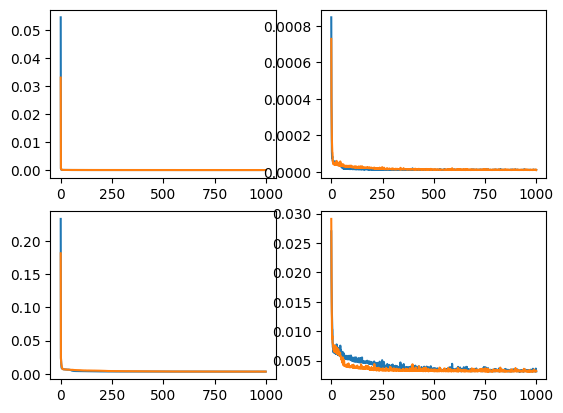

In [317]:
fig, ax = plt.subplots(2,2)

ax[0,0].plot(history.history['loss'])
ax[0,0].plot(history_2.history['loss'])

ax[0,1].plot(history.history['val_loss'])
ax[0,1].plot(history_2.history['val_loss'])

ax[1,0].plot(history.history['root_mean_squared_error'])
ax[1,0].plot(history_2.history['root_mean_squared_error'])

ax[1,1].plot(history_2.history['val_root_mean_squared_error'])
ax[1,1].plot(history.history['val_root_mean_squared_error'])



In [307]:
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [319]:
FLT_1_Sigmoid = DataFrame(y_pred, columns=['Cd','Cl','Cm'])
FLT_1_Sigmoid.to_excel(excel_writer='FLT 1 sigmoid prediction.xlsx')
FLT_1_Tanh = DataFrame(y_pred_2, columns=['Cd','Cl','Cm'])
FLT_1_Sigmoid.to_excel(excel_writer='FLT 1 tanh prediction.xlsx')


R-square sigmoid: 0.7346931958866263
R-square tanh: 0.8555980611281446


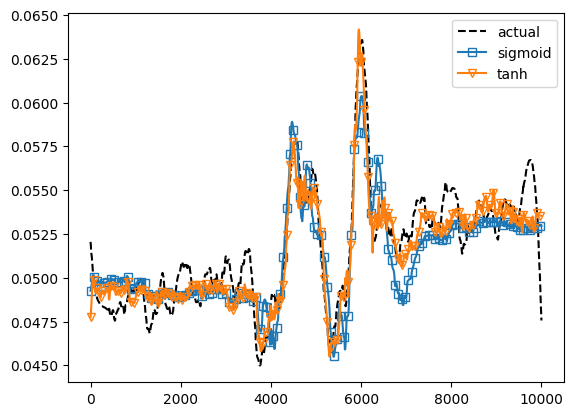

In [321]:

plt.plot(y_test[:,0], 'k--', label = 'actual')
plt.plot(y_pred[:,0], marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
plt.plot(y_pred_2[:,0], marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
print('R-square sigmoid:',r2_score(y_test[:,0], y_pred[:,0]))
print('R-square tanh:',r2_score(y_test[:,0], y_pred_2[:,0]))
plt.legend()


R-square sigmoid: 0.9969041666385344
R-square tanh: 0.9967825689759748


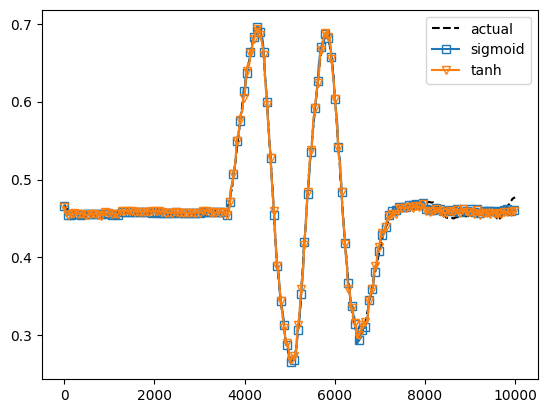

In [322]:
plt.plot(y_test[:,1], 'k--', label = 'actual')
plt.plot(y_pred[:,1], marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
plt.plot(y_pred_2[:,1], marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
print('R-square sigmoid:',r2_score(y_test[:,1], y_pred[:,1]))
print('R-square tanh:',r2_score(y_test[:,1], y_pred_2[:,1]))
plt.legend()



R-square sigmoid: 0.9165307414467281
R-square tanh: 0.9252759435628106


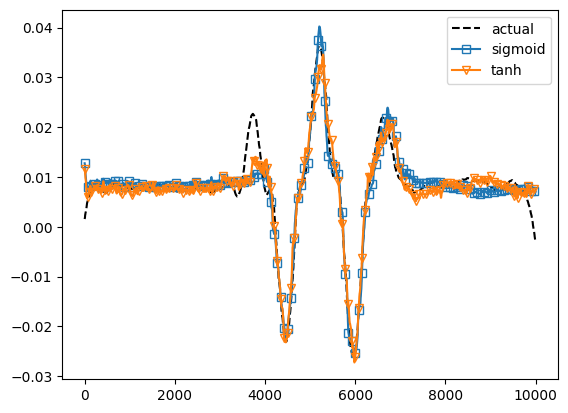

In [323]:
plt.plot(y_test[:,2], 'k--', label = 'actual')
plt.plot(y_pred[:,2], marker = 's', markerfacecolor = 'none' ,markevery = 75, label = 'sigmoid')
plt.plot(y_pred_2[:,2], marker = 'v', markerfacecolor = 'none',markevery = 75, label = 'tanh')
print('R-square sigmoid:',r2_score(y_test[:,2], y_pred[:,2]))
print('R-square tanh:',r2_score(y_test[:,2], y_pred_2[:,2]))
plt.legend()

In [324]:
print ("Overall:")
print('R-square sigmoid:',r2_score(y_test, y_pred))
print('R-square tanh:',r2_score(y_test, y_pred_2))



Overall:
R-square sigmoid: 0.8827093679906293
R-square tanh: 0.9258855245556433
